 # Investigation of the Palmer Penguins Data Set
Author: Myles Henehan
 ***
 This notebook contains my analysis of the famous Palmer Penguins dataset.

## Background

The origins of the Palmer Penguins data set can be traced back to the work of Dr. Kristen Gorman and the Palmer Station, a research facility operated by the United States Antarctic Program (USAP). The data contained within this set pertains to the characteristics and species of penguins living on islands around the Palmer Archipegalo in the Antarctic. Being open and accessible, this data set is commonly used by students starting out in the field of data analytics, as it allows them to practice data manipulation using manageable real-life examples.

## Structure and Variables in the Palmer Penguins Data Set

The Palmer Penguins data set consists of 334 rows, each representing an individual penguin observed in the region. There are also 7 columns, or 'data series' as they are called in data analytics terms, each representing a different characteristic or variable pertaining to the individual. The variables comprise the species of the individual, the island on which it was found, the sex of the penguin, and a number of physical measurements, including bill length, bill depth, flipper length, and body mass.

## Identifying the variable types useful for analysis

Looking at the variables outlined above, it is clear that there are two main variable types for consideration in this data set: categorical and numerical.

Categorical variables represent qualitative attributes: in other words, information that describes qualities or characteristics, rather than quantities or numerical values. In the case of this data set, Species, Island and Sex would be considered the 3 categorical values. Unlike numerical variables, which can reach an infinite number, categorical variables are typically finite. For example, while I can't say for sure that there aren't any examples of intersex penguins in the Antarctic, the vast majority of penguins surveyed will fit into the category of either Male or Female. Similarly, there is only a certain number of islands that have been surveyed and a certain number of species that scientists in the region are aware of.

Numerical variables, on the other hand, represent quantitative attributes, that can be counted, compared, and subjected to mathematical operations. In this data set, we have 4 such variables: bill length, bill depth, flipper length and body mass. Unlike with categorical variables, there is really an infinite number of values that we can have. For example, no two penguins are likely to have the exact same flipper length. Perhaps, by rounding up to an integer you could, but looking at them as floats, there is always going to be some margin of variation, even if that is only 10^{-5} of a milimetre.

## Libraries

Before beginning any sort of exploration of the data, we first need to import the essential libraries.

The first thing we need to import is pandas, an open-source Python library used for data manipulation and analysis. Since this Python library is geared towards tabular data, it is a perfect tool to explore the dataset and visualise it in a logical way. 

We will also need to import Matplotlib to produce a relevant bar chart and histogram of some of these variables. The benefit of this plotting library is that it is highly customisable, allowing us to have greater control over our plots.

Finally, we will need to import numpy to help us get the best fit line.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Frames

Finally, we will need to read in the data set itself. Let's take a quick look:

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
#Here, df stands for "Data Frame". The function pd.read_csv allows us to read a csv file.

In [60]:
# Now let's show it:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [61]:
# Let's take a look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [62]:
# sex of penguins
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [63]:
# Count the number of penguins of each species
PenguinSpecies = df['species'].value_counts()

## Bar Chart

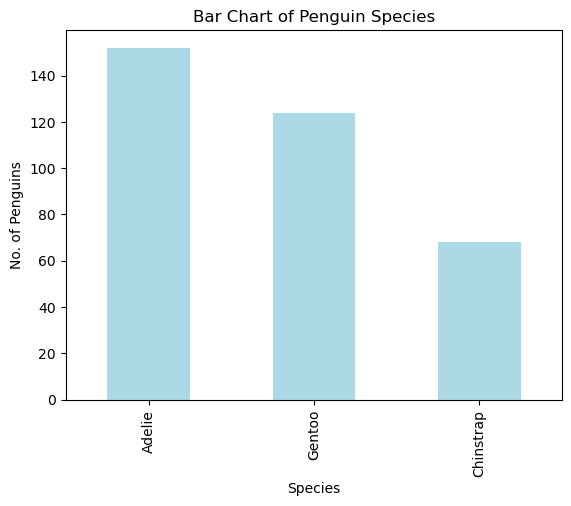

In [64]:
PenguinSpecies.plot(kind='bar', color='lightblue') # this function plots a bar chart of the counts of penguin species
plt.xlabel('Species')
plt.ylabel('No. of Penguins')
plt.title('Bar Chart of Penguin Species')
#Added labels and a title
plt.show()

As we can see from the bar chart, the Adelie species of penguin is the most common, with around 150 individual penguins. Meanwhile, the Chinstrap is the rarest penguin, with only 70 of them identified.

In [65]:
# Describe the body mass of the penguins
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Histogram

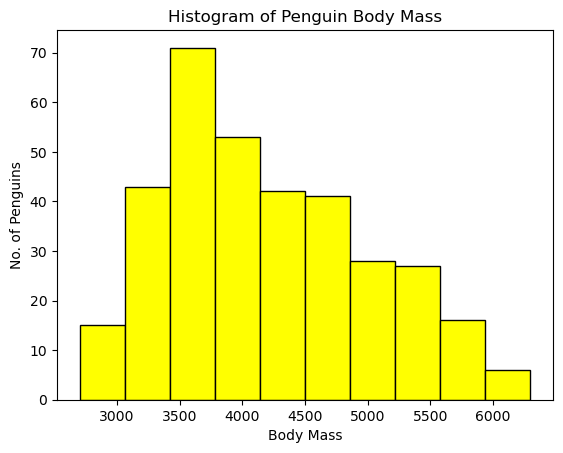

In [66]:
column_name = 'body_mass_g'
plt.hist(df[column_name], bins=10, color='yellow', edgecolor='black')
plt.xlabel('Body Mass')
plt.ylabel('No. of Penguins')
plt.title('Histogram of Penguin Body Mass')
plt.show()


## Analysis of the Correlation between Two Variables

A variable by itself does not offer us a lot of information. It's only when we look at the correlation between 2 variables that we start to see interesting patterns.

The easiest way to plot two different variables and check their correlation is as a scatter splot. Here, I am interested in the correlation between bill length and bill depth. My assumption is that the longer the bill, the deeper it will be. This would conform with the standard in nature, where things tend to grow exponentially.

Let's have a look at these variables first:

In [110]:
# We're going to start by defining the data series in the data frame, bill_depth_mm, as billdepth
billdepth = df['bill_depth_mm']

# Let's convert this to a numpy array to make it easier to work with:

billdepth = billdepth.to_numpy()

# Now, let's do the same 2 steps with the bill length:
billlen = df['bill_length_mm']
billlen = billlen.to_numpy()

# Remove NaN values from the data
valid_indices = ~np.isnan(billdepth) & ~np.isnan(billlen)
billdepth = billdepth[valid_indices]
billlen = billlen[valid_indices]


#Note: when trying to get the best fit line, I was getting the error that parameter number 4 had an illegal value. By using boolean indexing method, I managed to remove these from the array.
# This is something I don't know much about, but it solved the issue (Source: ChatGPT)


Now, let's create a scatter plot using these arrays.

Text(0, 0.5, 'Bill Length')

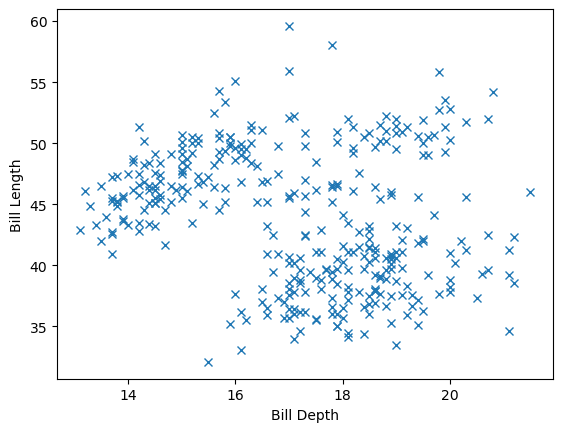

In [114]:
# Create a new figure and set of axes (stateless approach).
#fig is the overall figure, and ax is the set of axes on this figure
fig, ax = plt.subplots()

#Here's the function to create a plot:
ax.plot(billdepth, billlen, 'x')

# Now let's add some labels:
ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')

#X limits
#ax.set_xlim(30,60)
#ax.set_ylim(40,60)

#I would use fig.show(), but jupyter notebooks do this automatically

Looking at this scatter plot, there doesn't seem to be a huge correlation. On the contrary, it appears that we have clusters of data. The first thing that springs to mind is whether this is because our data sam

## Add a Best Fit Line
***

Getting the Pearson Coefficient:

In [116]:
# uses the y = mx + c method

m, c = np.polyfit(billdepth, billlen, 1)

m, c

#note, when testing this, I was getting the error that parameter number 4 had an illegal value. 


(-0.6498355630183155, 55.06736977191969)

Mapping onto our plot:

Text(0, 0.5, 'Bill Length')

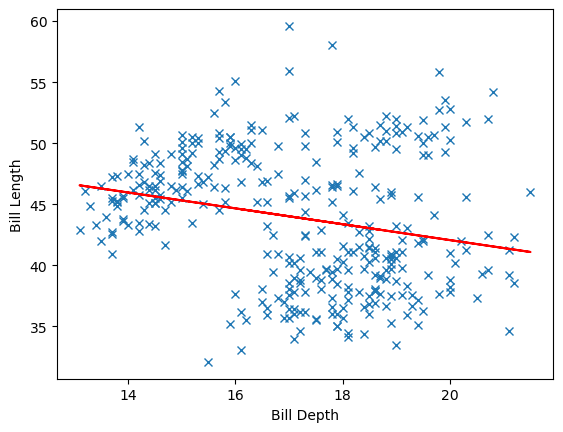

In [118]:
# Let's plot a red line onto the plot

fig, ax = plt.subplots()

ax.plot(billdepth, billlen, 'x')

#This time we're adding another plot command to insert our best fit line:
# "r-" represents the red line. 
ax.plot(billdepth, m * billdepth + c, 'r-')

ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')

Interestingly enough, this correlation actually appears to be negative.

Source to insert: https://www.researchgate.net/publication/362573623_Palmer_Archipelago_Penguins_Data_in_the_palmerpenguins_R_Package_-_An_Alternative_to_Anderson%27s_Irises?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ#pf6

## References

Data originally published in:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

# End